In [60]:
from google.colab import drive

#In case you are using google colab

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
from PIL import Image
import cv2
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

class_names = ['Triche', 'Non_Triche']

data_dir = 'YourDataPath'

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if image is not None:
            image = cv2.resize(image, (200, 200))
            images.append(image)
            labels.append(class_names.index(class_name))

images = np.array(images)
labels = np.array(labels)

images = images / 255.0

labels = to_categorical(labels, len(class_names))

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=0,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(200,200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_names), activation='softmax'))

In [53]:
import zipfile
import tensorflow as tf



model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=16, validation_data=(val_images, val_labels))


test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/16
18/18 [==============================] - 42s 2s/step - loss: 0.7142 - accuracy: 0.4800 - val_loss: 0.6929 - val_accuracy: 0.5580
Epoch 2/16
18/18 [==============================] - 41s 2s/step - loss: 0.6928 - accuracy: 0.5382 - val_loss: 0.6919 - val_accuracy: 0.5290
Epoch 3/16
18/18 [==============================] - 40s 2s/step - loss: 0.6890 - accuracy: 0.5345 - val_loss: 0.7242 - val_accuracy: 0.4420
Epoch 4/16
18/18 [==============================] - 40s 2s/step - loss: 0.6754 - accuracy: 0.5818 - val_loss: 0.6521 - val_accuracy: 0.5797
Epoch 5/16
18/18 [==============================] - 42s 2s/step - loss: 0.6259 - accuracy: 0.6527 - val_loss: 0.6857 - val_accuracy: 0.5797
Epoch 6/16
18/18 [==============================] - 42s 2s/step - loss: 0.5459 - accuracy: 0.7400 - val_loss: 0.6229 - val_accuracy: 0.6522
Epoch 7/16
18/18 [==============================] - 43s 2s/step - loss: 0.4518 - accuracy: 0.7782 - val_loss: 0.6054 - val_accuracy: 0.6667
Epoch 8/16
18/18 [==

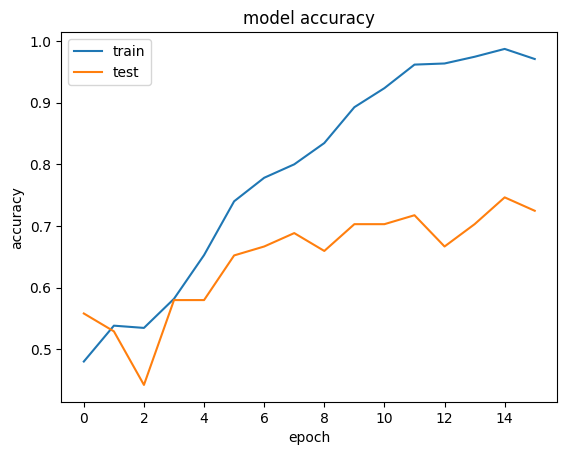

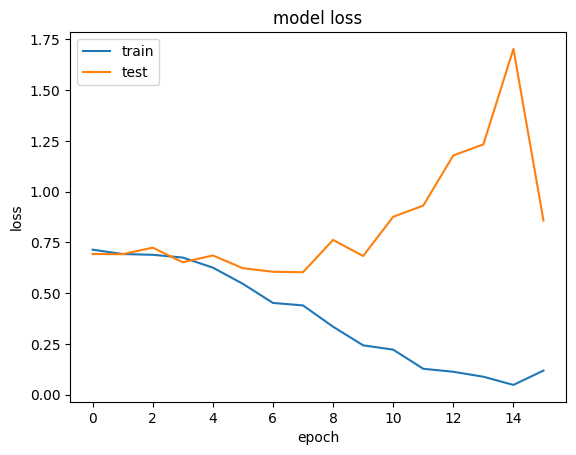

In [54]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# Save the model
model.save('model.h5')

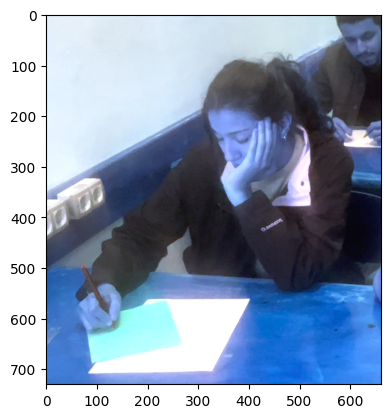

1/1 [==============================] - 0s 176ms/step
Classe prédite: Non_Triche
Probabilités: [0.2795172  0.72048277]



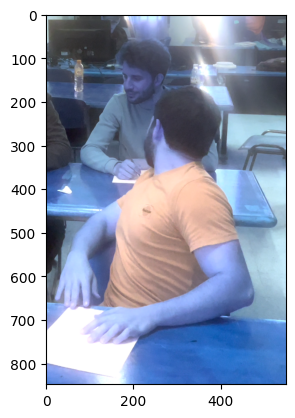

1/1 [==============================] - 0s 96ms/step
Classe prédite: Triche
Probabilités: [0.6086704  0.39132962]



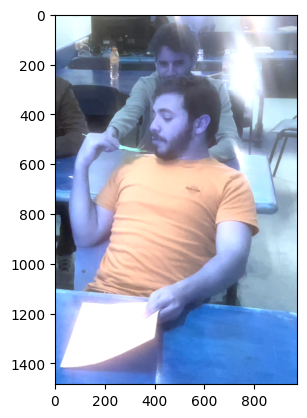

1/1 [==============================] - 0s 40ms/step
Classe prédite: Triche
Probabilités: [0.72489756 0.27510247]



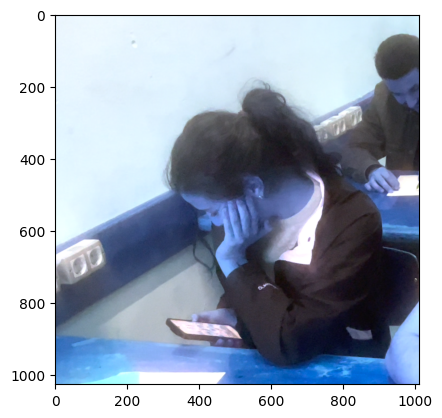

1/1 [==============================] - 0s 38ms/step
Classe prédite: Triche
Probabilités: [0.7209515  0.27904847]



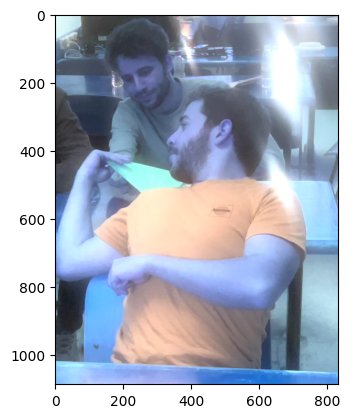

1/1 [==============================] - 0s 35ms/step
Classe prédite: Triche
Probabilités: [0.7303809  0.26961908]



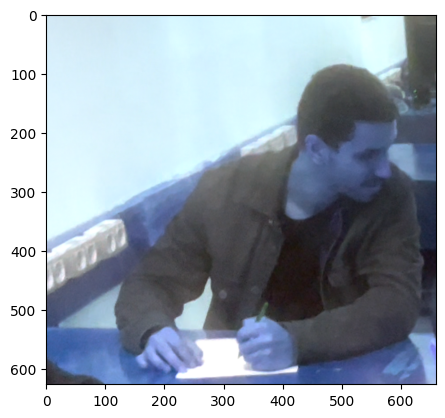

1/1 [==============================] - 0s 51ms/step
Classe prédite: Triche
Probabilités: [0.7287993  0.27120078]



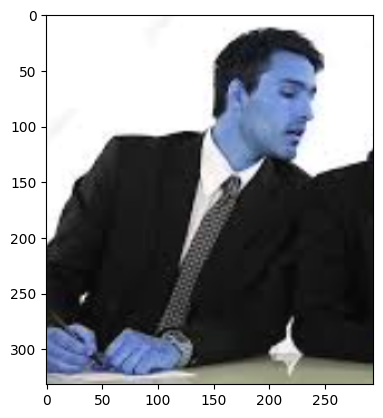

1/1 [==============================] - 0s 36ms/step
Classe prédite: Triche
Probabilités: [0.73075485 0.26924515]



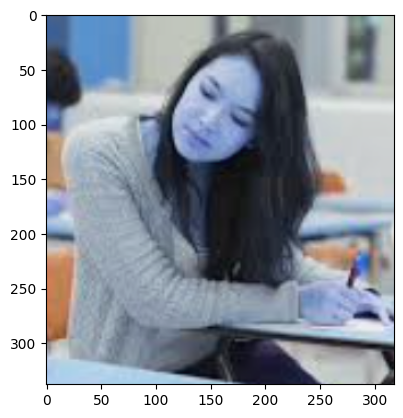

1/1 [==============================] - 0s 36ms/step
Classe prédite: Triche
Probabilités: [0.7200474  0.27995256]



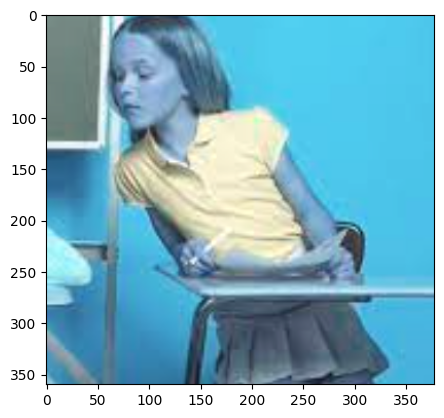

1/1 [==============================] - 0s 35ms/step
Classe prédite: Triche
Probabilités: [0.519487 0.480513]



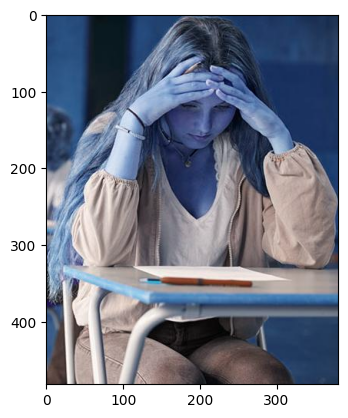

1/1 [==============================] - 0s 43ms/step
Classe prédite: Triche
Probabilités: [0.6968365  0.30316356]



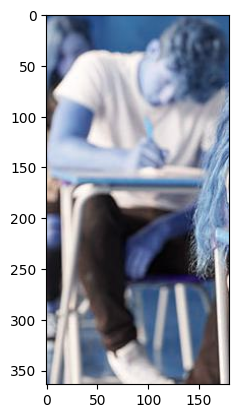

1/1 [==============================] - 0s 36ms/step
Classe prédite: Triche
Probabilités: [0.7306689  0.26933113]



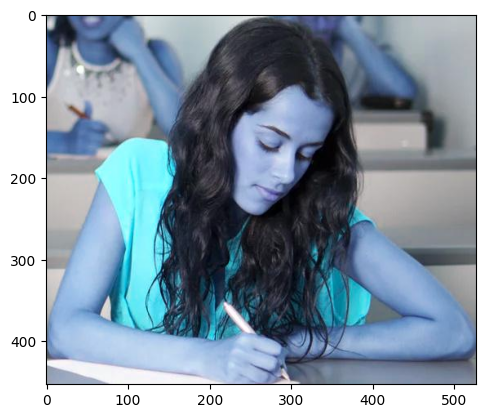

1/1 [==============================] - 0s 45ms/step
Classe prédite: Non_Triche
Probabilités: [0.3008922  0.69910777]



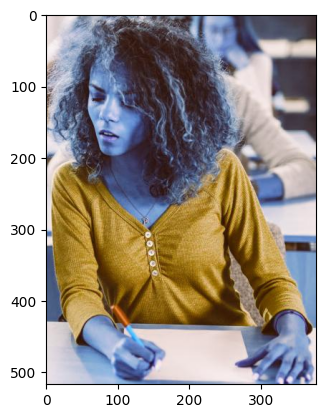

1/1 [==============================] - 0s 41ms/step
Classe prédite: Triche
Probabilités: [0.71133465 0.28866532]



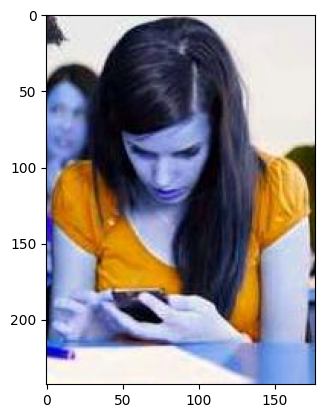

1/1 [==============================] - 0s 38ms/step
Classe prédite: Triche
Probabilités: [0.7307878 0.2692122]



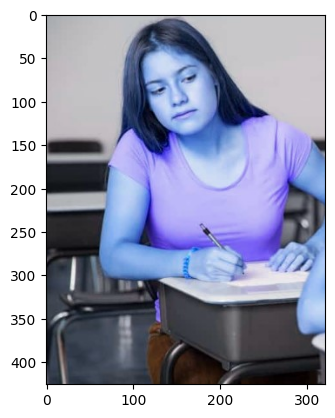

1/1 [==============================] - 0s 39ms/step
Classe prédite: Triche
Probabilités: [0.7279474 0.2720526]



In [58]:
class_names = ['Triche', 'Non_Triche']
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the saved model
model = tf.keras.models.load_model('model.h5')


test_dir = 'YourPath'

image_paths = [
    "1.png",
    "2.png",
    "3.png",
    "4.png",
    "5.png",
    "6.png",
    "7.png",
    "8.png",
    "9.png",
    "result14.jpg",
    "result13.jpg",
    "result26.jpg",
    "result2.jpg",
    "result19.jpg",
    "Capture3.jpg",
]

for image_name in image_paths:
    test_image_path = os.path.join(test_dir, image_name)

    test_image = cv2.imread(test_image_path)

    if test_image is not None:
        plt.imshow(test_image, cmap='gray')
        plt.show()
        test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
        test_image = cv2.resize(test_image, (200, 200))
        test_image = test_image / 255.0
        test_image = np.expand_dims(test_image, axis=0)
        predictions = model.predict(test_image)
        probabilities = tf.nn.softmax(predictions)
        predicted_class_index = tf.argmax(probabilities, axis=1).numpy()[0]
        predicted_class = class_names[predicted_class_index]

        print("Classe prédite:", predicted_class)
        print("Probabilités:", probabilities.numpy()[0])
        print()
    else:
        print("Échec du chargement de l'image :", test_image_path)
